# 1. SVM Kernel trick program

Accuracy: 0.98
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



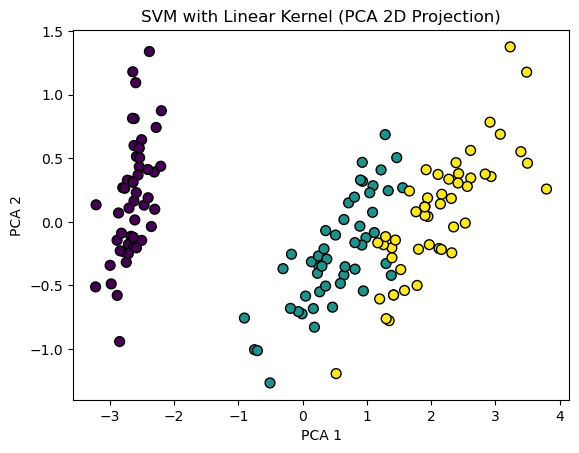

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X, y = load_iris(return_X_y=True)

X_pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear').fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title("SVM with Linear Kernel (PCA 2D Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# 2. Random Forest Algorithm

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=43)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.88      0.88      0.88        26
   virginica       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



# 3. Random Forest Boosting using AdaBoostClassifier

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'AdaBoost Accuracy: {accuracy:.2f}')
print(f'\nClassification Report \n{classification_report(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

AdaBoost Accuracy: 0.93

Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion matrix: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


# 4. Random Forest Boosting using Gradient

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
x = data.data
y = data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Gradient Boosting Accuracy: {accuracy:.2f}')
print(f'\nClassification Report \n{classification_report(y_test, y_pred)}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

Gradient Boosting Accuracy: 1.00

Classification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# 5. Implement Code on the Decision Tree

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f} %')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')
print('\nActual vs Predicted labels for first 10 samples:')
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual}, Predicted: {predicted}')

Accuracy: 97.78 %
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


Actual vs Predicted labels for first 10 samples:
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1


# 6. EM

C:\Users\vbash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vbash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


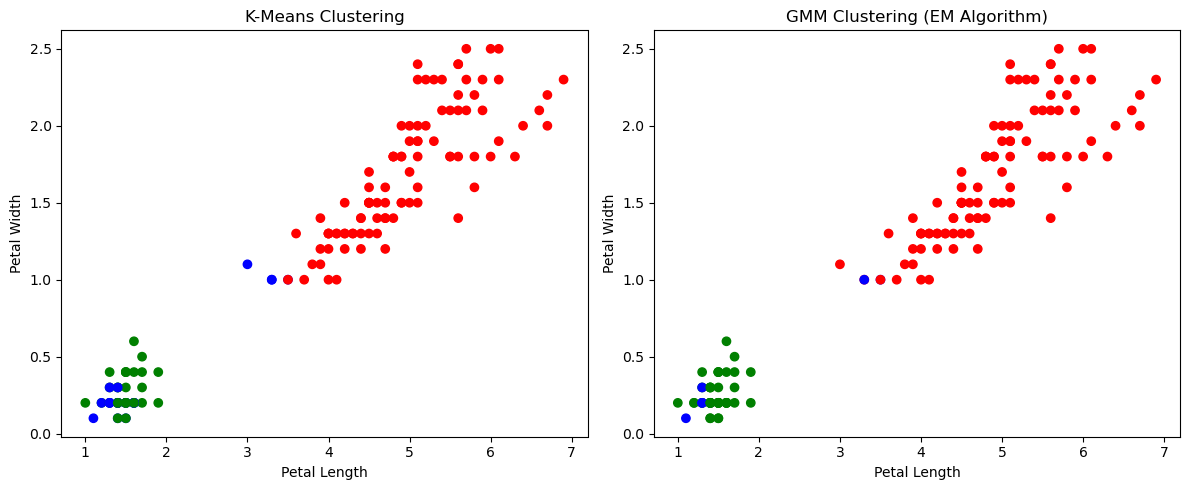

Adjusted Rand Index (KMeans): 0.432804702527474
Adjusted Rand Index (GMM): 0.5164585360868599
Silhouette Score (KMeans): 0.4798814508199817
Silhouette Score (GMM): 0.4751434694267145

Observation:
GMM (EM) often captures data distribution better than KMeans when clusters are not spherical.
In this case, ARI and Silhouette scores help evaluate clustering quality.


In [45]:
#EM
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import pandas as pd
import numpy as np

iris = datasets.load_iris()

# Normalize data
data = pd.DataFrame(iris.data, columns=iris.feature_names) 
data_scaled = scaler.fit_transform(data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.predict(data_scaled)

# Apply GMM (EM algorithm)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_scaled)
gmm_labels = gmm.predict(data_scaled)

# Visual Comparison
colormap = np.array(['red', 'green', 'blue'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=colormap[kmeans_labels])
plt.title("K-Means Clustering")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=colormap[gmm_labels])
plt.title("GMM Clustering (EM Algorithm)")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

# Comparison Metrics
true_labels = iris.target
print("Adjusted Rand Index (KMeans):", adjusted_rand_score(true_labels, kmeans_labels))
print("Adjusted Rand Index (GMM):", adjusted_rand_score(true_labels, gmm_labels))
print("Silhouette Score (KMeans):", silhouette_score(data_scaled, kmeans_labels))
print("Silhouette Score (GMM):", silhouette_score(data_scaled, gmm_labels))

# Comment
print("\nObservation:")
print("GMM (EM) often captures data distribution better than KMeans when clusters are not spherical.")
print("In this case, ARI and Silhouette scores help evaluate clustering quality.")